# **Part 1**

Facebook engineers face the challenge of selecting machine learning (ML) features that improve model performance without exceeding the finite capacity of infrastructure services such as memory, CPU, and storage. Each feature has an associated gain to model quality and costs in different services. The problem is to decide which features to keep (either uncompressed or compressed) to maximize overall gain while respecting service capacity limits.

Decision Variables


Let:

\begin{align*}
x_i &=
\begin{cases}
1 & \text{if feature } i \text{ is selected uncompressed}, \\
0 & \text{otherwise},
\end{cases} \\
y_i &=
\begin{cases}
1 & \text{if feature } i \text{ is selected compressed}, \\
0 & \text{otherwise}.
\end{cases}
\end{align*}

Objective Function

Let:

\begin{align*}
g_{f,i} &= \text{gain from feature } i \text{ if uncompressed}, \\
g_{c,i} &= \text{gain from feature } i \text{ if compressed}.
\end{align*}

We aim to maximize the total gain:

\begin{align}
\max G = \sum_{i=1}^{n} \left( g_{f,i} x_i + g_{c,i} y_i \right)
\end{align}

**Constraints**

1. Mutual Exclusivity

- A feature cannot be selected in both forms:

\begin{align}
x_i + y_i \leq 1, \quad \forall i
\end{align}

2. Service Capacity
    Suppose we have two services
\begin{align*}
\text{Let services } A \text{ and } B \text{ have capacities } C_A \text{ and } C_B \text{ respectively.}
\end{align*}

\begin{align*}
s_{A,f,i},\; s_{A,c,i} &= \text{Service A cost for feature } i \text{ (uncompressed/compressed)}, \\
s_{B,f,i},\; s_{B,c,i} &= \text{Service B cost for feature } i \text{ (uncompressed/compressed)}.
\end{align*}

  Then:

\begin{align}
\sum_{i=1}^{n} \left( s_{A,f,i} x_i + s_{A,c,i} y_i \right) &\leq C_A, \\
\sum_{i=1}^{n} \left( s_{B,f,i} x_i + s_{B,c,i} y_i \right) &\leq C_B
\end{align}

3.  **Compression Enabler Features**
    
    Certain features must be included to enable compression:

    \begin{align}
x_i \geq r_i, \quad r_i \in \{0, 1\} \quad \text{(given)}
\end{align}

**Complete MILP Formulation**

\begin{align*}
\text{maximize} \quad & \sum_{i=1}^{n} \left( g_{f,i} x_i + g_{c,i} y_i \right) \\
\text{subject to} \quad
& x_i + y_i \leq 1, \quad \forall i, \\
& \sum_{i=1}^{n} \left( s_{A,f,i} x_i + s_{A,c,i} y_i \right) \leq C_A, \\
& \sum_{i=1}^{n} \left( s_{B,f,i} x_i + s_{B,c,i} y_i \right) \leq C_B, \\
& x_i \geq r_i, \quad \forall i, \\
& x_i, y_i \in \{0, 1\}, \quad \forall i.
\end{align*}

**Impact**

* By solving this Mixed-Integer Linear Program (MILP), Facebook can:

* Automatically select optimal features,

* Quantify trade-offs between services,

* Evaluate the value of compression,

* Guide infrastructure investment decisions.

This LP framework replaces manual decision-making, scales to many models, and allows rapid scenario testing for capacity changes, ultimately improving both model quality and infrastructure efficiency.

2 Farmer's Optimization Problem
A farmer has 500 acres of land to allocate among wheat, corn, and sugar beets.
The goal is to maximize profit, considering:

Yield per acre
Planting costs
Selling prices (with price thresholds for sugar beets)
Minimum feed demand
Backup purchase costs
We define decision variables for how many acres to plant, how much to sell, and how much to purchase for feed.

Decision Variables
Let the following variables represent the farmer’s decisions:

\begin{align*}
x_1 &= \text{Acres used for wheat} \\
x_2 &= \text{Acres used for corn} \\
x_3 &= \text{Acres used for sugar beets} \\
p_1 &= \text{Tons of wheat sold} \\
p_2 &= \text{Tons of corn sold} \\
p_3 &= \text{Tons of sugar beets sold at £36 (first 6000 T)} \\
p_4 &= \text{Tons of sugar beets sold at £10 (beyond 6000 T)} \\
y_1 &= \text{Tons of wheat purchased to meet feed demand} \\
y_2 &= \text{Tons of corn purchased to meet feed demand}
\end{align*}


**Objective Function: Maximum Profit**

\begin{align*}
\text{Objective Function:} \quad & \text{Maximize Profit} \\
\text{Profit} &= \text{Revenue} - \text{Planting Cost} - \text{Feed Purchase Cost} \\
\\
\text{Revenue:} \quad & £170 \times p_1 \quad \text{(wheat sold)} \\
& + £150 \times p_2 \quad \text{(corn sold)} \\
& + £36 \times p_3 \quad \text{(sugar beets sold } \leq 6000 \text{ T)} \\
& + £10 \times p_4 \quad \text{(sugar beets sold } > 6000 \text{ T)} \\
\\
\text{Planting Cost:} \quad & £150 \times x_1 \\
& + £230 \times x_2 \\
& + £260 \times x_3 \\
\\
\text{Backup (Feed Purchase) Cost:} \quad & £238 \times y_1 \quad \text{(wheat purchased)} \\
& + £210 \times y_2 \quad \text{(corn purchased)} \\
\\
\text{Thus, the profit function becomes:} \quad & \text{Maximize:} \\
    170p_1 + 150p_2 + 36p_3 + 10p_4 - 150x_1 - 230x_2 - 260x_3 - 238y_1 - 210y_2 \\
\\
\text{Constraints:} \\
\text{Land Availability:} \quad & x_1 + x_2 + x_3 \leq 500
\end{align*}

## Objective Function: Maximize Profit

Profit = Revenue – Planting Cost – Feed Purchase Cost

### Revenue:
- £170 × $p_1$ (wheat sold)
- £150 × $p_2$ (corn sold)
- £36 × $p_3$ (sugar beets sold ≤ 6000 T)
- £10 × $p_4$ (sugar beets sold > 6000 T)

### Planting Cost:
- £150 × $x_1$
- £230 × $x_2$
- £260 × $x_3$

### Backup (Feed Purchase) Cost:
- £238 × $y_1$ (wheat purchased)
- £210 × $y_2$ (corn purchased)

Thus, the profit function becomes:

$$
\text{Maximize: }
170p_1 + 150p_2 + 36p_3 + 10p_4 - 150x_1 - 230x_2 - 260x_3 - 238y_1 - 210y_2
$$

**Summary of Data**

##  Summary of Data

| Parameter              | Wheat | Corn | Sugar Beets |
|------------------------|-------|------|--------------|
| Yield (T/acre)         | 2.5   | 3    | 20           |
| Feed demand (T)        | 200   | 240  | –            |
| Planting cost (£/acre) | 150   | 230  | 260          |
| Selling price (£/T)    | 170   | 150  | £36 ≤ 6000 T |
| Backup price (£/T)     | 238   | 210  | –            |


# **Part 2**

# **Implementation of Code**

In [ ]:
from pulp import LpProblem, LpMaximize, LpVariable, value
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

prob = LpProblem("Crop_Profit_Optimization", LpMaximize)

In [ ]:
land_wheat = LpVariable('Land_Wheat', lowBound=0)
land_corn = LpVariable('Land_Corn', lowBound=0)
land_beets = LpVariable('Land_Beets', lowBound=0)

purchase_wheat = LpVariable('Purchase_Wheat', lowBound=0)
purchase_corn = LpVariable('Purchase_Corn', lowBound=0)


sell_wheat = LpVariable('Sell_Wheat', lowBound=0)
sell_corn = LpVariable('Sell_Corn', lowBound=0)
sell_beets_standard = LpVariable('Sell_Beets_Standard', lowBound=0, upBound=6000)
sell_beets_surplus = LpVariable('Sell_Beets_Surplus', lowBound=0)



# Defining Parameters and Objective

---

In [ ]:

from pulp import LpMaximize, LpProblem, LpVariable

model = LpProblem(name="profit-maximization", sense=LpMaximize)

yield_wheat = 2.5
yield_corn = 3.0
yield_beets = 20.0

model += (
    170 * sell_wheat +
    150 * sell_corn +
    36 * sell_beets_standard +
    10 * sell_beets_surplus -
    238 * purchase_wheat -
    210 * purchase_corn -
    150 * land_wheat -
    230 * land_corn -
    260 * land_beets
), "Net_Profit"


In [ ]:
model += land_wheat + land_corn + land_beets <= 500, "Land_Constraint"

model += yield_wheat * land_wheat + purchase_wheat - sell_wheat >= 200, "Wheat_Feed_Demand"
model += yield_corn * land_corn + purchase_corn - sell_corn >= 240, "Corn_Feed_Demand"

model += yield_beets * land_beets == sell_beets_standard + sell_beets_surplus, "Beets_Sales_Constraint"

In [ ]:
model.solve()

print("Status:", model.status)
print("\nOptimal solution:")
print("Category\t\tWheat\tCorn\tSugar Beets")
print("Land Used (Acres)\t{:.2f}\t{:.2f}\t{:.2f}".format(value(land_wheat), value(land_corn), value(land_beets)))
print("Yield (Tonnes)\t\t{:.2f}\t{:.2f}\t{:.2f}".format(
    value(land_wheat)*yield_wheat, value(land_corn)*yield_corn, value(land_beets)*yield_beets))
print("Sales (Tonnes)\t\t{:.2f}\t{:.2f}\t{:.2f}".format(
    value(sell_wheat), value(sell_corn), value(sell_beets_standard + sell_beets_surplus)))
print("Purchases (Tonnes)\t{:.2f}\t{:.2f}".format(value(purchase_wheat), value(purchase_corn)))
print("\nTotal Profit: £{:.2f}".format(value(model.objective)))

Status: 1

Optimal solution:
Category		Wheat	Corn	Sugar Beets
Land Used (Acres)	120.00	80.00	300.00
Yield (Tonnes)		300.00	240.00	6000.00
Sales (Tonnes)		100.00	0.00	6000.00
Purchases (Tonnes)	0.00	0.00

Total Profit: £118600.00


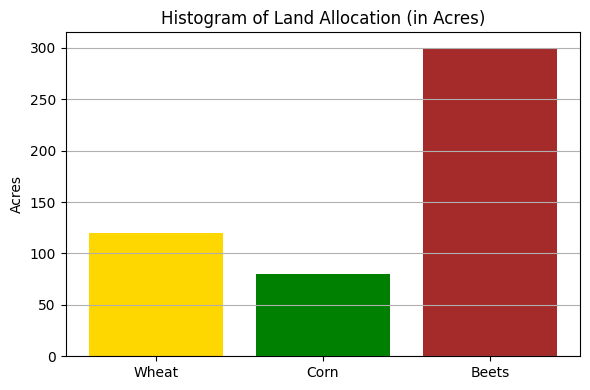

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Wheat', 'Corn', 'Beets'],
        [value(land_wheat), value(land_corn), value(land_beets)],
        color=['gold', 'green', 'brown'])
plt.title("Histogram of Land Allocation (in Acres)")
plt.ylabel("Acres")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

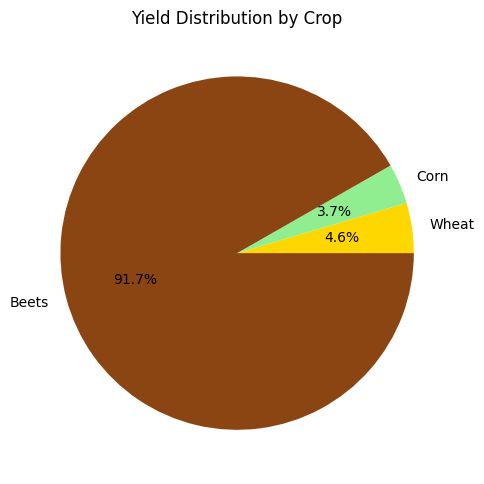

In [ ]:
yield_distribution = [
    value(land_wheat)*yield_wheat,
    value(land_corn)*yield_corn,
    value(land_beets)*yield_beets
]
plt.figure(figsize=(5, 5))
plt.pie(yield_distribution,
        labels=['Wheat', 'Corn', 'Beets'],
        autopct='%1.1f%%',
        colors=['gold', 'lightgreen', 'saddlebrown'])
plt.title("Yield Distribution by Crop")
plt.tight_layout()
plt.show()


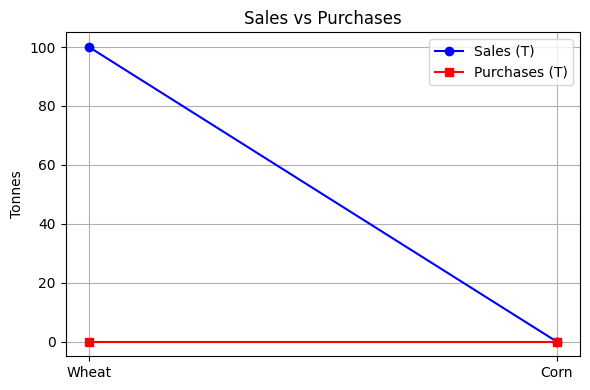

In [ ]:
sales = [value(sell_wheat), value(sell_corn)]
purchases = [value(purchase_wheat), value(purchase_corn)]

plt.figure(figsize=(6, 4))
plt.plot(['Wheat', 'Corn'], sales, marker='o', label='Sales (T)', color='blue')
plt.plot(['Wheat', 'Corn'], purchases, marker='s', label='Purchases (T)', color='red')
plt.title("Sales vs Purchases")
plt.ylabel("Tonnes")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

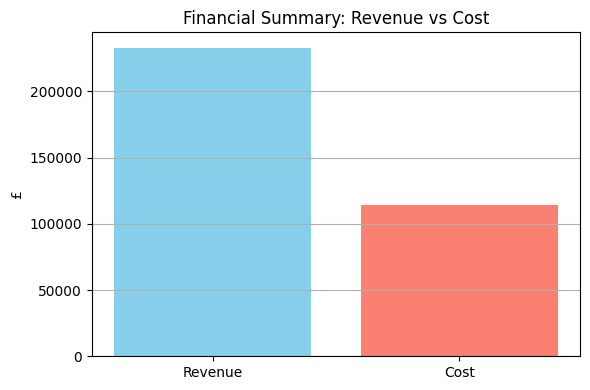

In [ ]:
total_revenue = (
    170 * value(sell_wheat) +
    150 * value(sell_corn) +
    36 * value(sell_beets_standard) +
    10 * value(sell_beets_surplus)
)

total_cost = (
    238 * value(purchase_wheat) +
    210 * value(purchase_corn) +
    150 * value(land_wheat) +
    230 * value(land_corn) +
    260 * value(land_beets)
)

plt.figure(figsize=(6, 4))
plt.bar(['Revenue', 'Cost'], [total_revenue, total_cost], color=['skyblue', 'salmon'])
plt.title("Financial Summary: Revenue vs Cost")
plt.ylabel("£")
plt.grid(axis='y')
plt.tight_layout()
plt.show()